In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
order = 2
a = 1
b = 2
h = 0.1
n = np.round((b-a)/h).astype(np.int32)
y_0 = 0
y_n = 4*np.exp(2)


In [3]:
def k(x, y0, y1):
    return y1, (3 * y1 / x) - (3 * y0 / (x**2)) + 2 * (x**2) * np.exp(x)


def func(x):
    return 2*x*(x-1)*np.exp(x)

In [4]:
def rk4(a, b, y_0, y_n, h, k):
    n = np.round((b - a) / h).astype(np.int32)
    Yi = np.zeros((2, n + 1))
    Xi = np.linspace(a, b, n + 1)
    Yi[0, 0] = y_0
    Yi[0, -1] = y_n

    guess = [0, 2]
    err = 10
    Yi[1, 0] = guess[0]
    for i in range(1, n + 1):
        k1 = k(Xi[i - 1], Yi[0, i - 1], Yi[1, i - 1])
        k2 = k(
            Xi[i - 1] + h / 2,
            Yi[0, i - 1] + h * k1[0] / 2,
            Yi[1, i - 1] + h * k1[1] / 2,
        )
        k3 = k(
            Xi[i - 1] + h / 2,
            Yi[0, i - 1] + h * k2[0] / 2,
            Yi[1, i - 1] + h * k2[1] / 2,
        )
        k4 = k(Xi[i - 1] + h, Yi[0, i - 1] + h * k3[0], Yi[1, i - 1] + h * k3[1])

        Yi[0, i] = Yi[0, i - 1] + h * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
        Yi[1, i] = Yi[1, i - 1] + h * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6

    while err > 1e-6:
        prev = Yi[0, -1]
        Yi[1, 0] = guess[-1]
        for i in range(1, n + 1):
            k1 = k(Xi[i - 1], Yi[0, i - 1], Yi[1, i - 1])
            k2 = k(
                Xi[i - 1] + h / 2,
                Yi[0, i - 1] + h * k1[0] / 2,
                Yi[1, i - 1] + h * k1[1] / 2,
            )
            k3 = k(
                Xi[i - 1] + h / 2,
                Yi[0, i - 1] + h * k2[0] / 2,
                Yi[1, i - 1] + h * k2[1] / 2,
            )
            k4 = k(Xi[i - 1] + h, Yi[0, i - 1] + h * k3[0], Yi[1, i - 1] + h * k3[1])

            Yi[0, i] = Yi[0, i - 1] + h * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) / 6
            Yi[1, i] = Yi[1, i - 1] + h * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) / 6

        guess.append(
            guess[-1] + (guess[-1] - guess[-2]) * (y_n - Yi[0, -1]) / (Yi[0, -1] - prev)
        )
        err = np.abs(Yi[0, -1] - y_n)

    return Xi, Yi

In [5]:
Xi, Yi = rk4(a, b, y_0, y_n, h, k)
Yi

array([[ 0.        ,  0.66091278,  1.59364921,  2.86204202,  4.54181291,
         6.72252176,  9.50981059, 13.02798435, 17.42297657, 22.86575434,
        29.5562244 ],
       [ 5.43660168,  7.87096226, 10.89004179, 14.60387171, 19.14062913,
        24.64939108, 31.30328356, 39.30307986, 48.88130954, 60.30694779,
        73.89076423]])

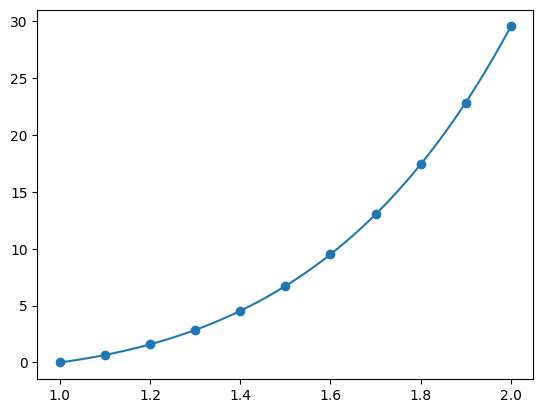

In [6]:
plt.scatter(Xi, Yi[0])
X = np.linspace(a, b, 10_000)
plt.plot(X, func(X))
plt.show()

In [7]:
def k(x, y0, y1):
    return y1, (1 - y1**2) / y0

Xi , Yi = rk4(0, 2, 1, 2, 0.4, k)

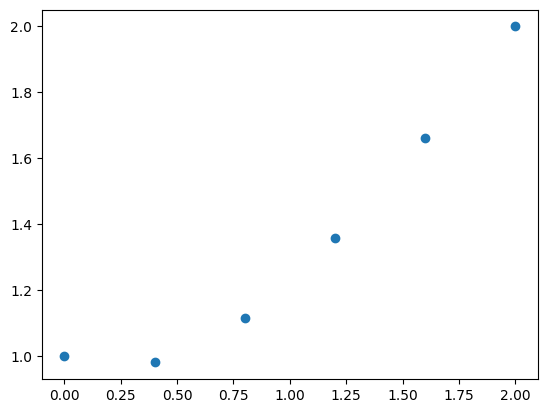

In [8]:
plt.scatter(Xi, Yi[0])
plt.show()

In [9]:
Yi

array([[ 1.        ,  0.97991816,  1.11357633,  1.35649511,  1.66134897,
         2.        ],
       [-0.25000671,  0.15324145,  0.49402896,  0.70026548,  0.81248396,
         0.87489816]])